In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

os.chdir("D:/data")

In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

D:\Python\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
D:\Python\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (99) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
## saving into another variable
data = combined_csv

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877986 entries, 0 to 118647
Columns: 109 entries, id to sec_app_mths_since_last_major_derog
dtypes: float64(47), int64(42), object(20)
memory usage: 736.8+ MB


There are total 877986 entires and 109 columns. Let us work on missing data first

In [6]:
data.head(5)

,id,funded_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,75910406,8400,36 months,9.75%,270.06,B3,RV Tech,2 years,MORTGAGE,66000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75768614,12000,36 months,7.89%,375.43,A5,facility manager,3 years,OWN,45000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75650131,28000,36 months,7.39%,869.57,A4,graphic designer ii,1 year,RENT,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76084025,10000,36 months,13.67%,340.18,C3,Cantor,10+ years,RENT,70000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76003313,20000,36 months,11.99%,664.20,C1,rn case manager,10+ years,MORTGAGE,49000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


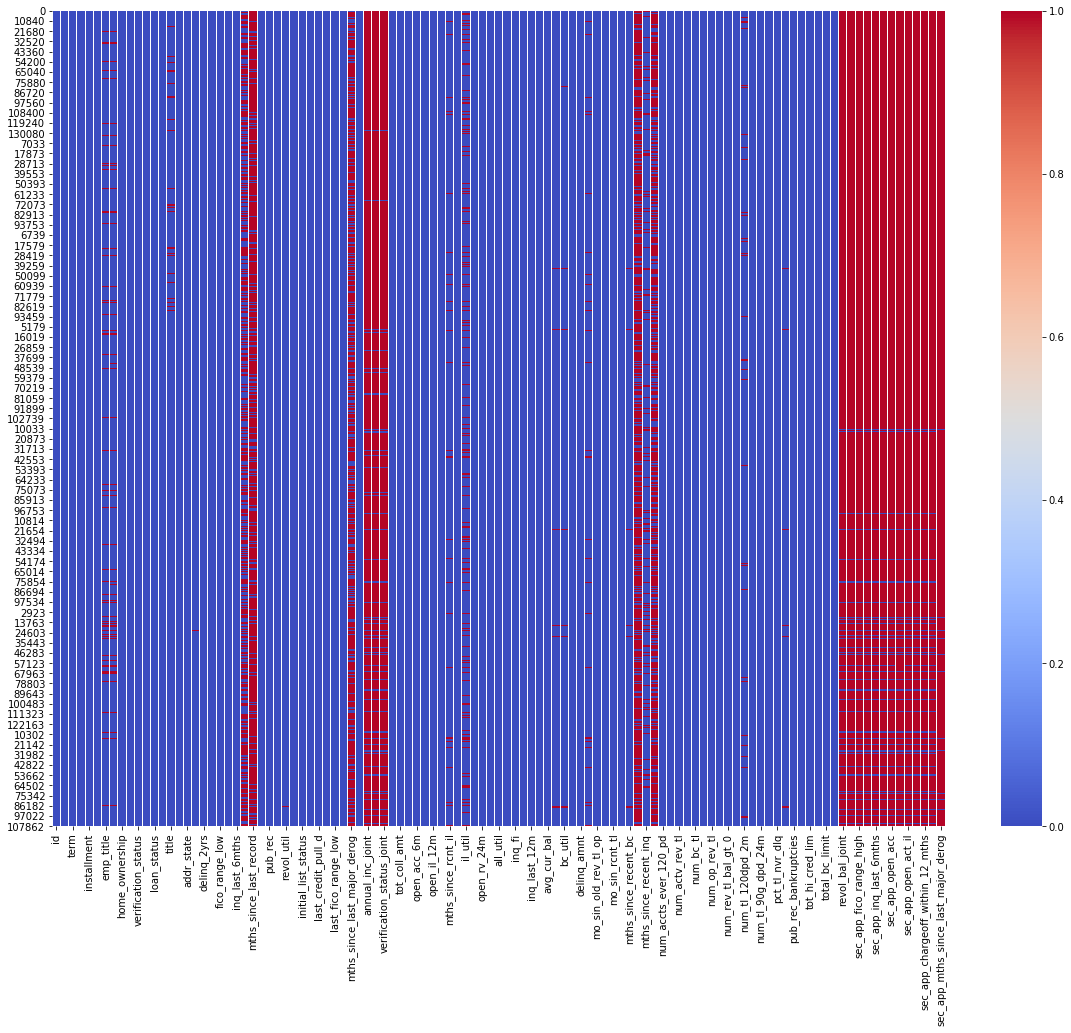

In [7]:
# visualizing the missing data using heatmap
fig = plt.figure(figsize=(20,15))

sns.heatmap(data.isnull(),cmap='coolwarm')
plt.show()

There is no data in the last 7 columns and also mnths_since_last_record ,annual_inc_joint,verification_status_joint has most of the missing values while other columns have less missing values. Let us check the percentage of the missing value.

In [8]:
# Missing values percentage
missing_col = []

for col in data.columns:
    missing_pct = np.mean(data[col].isnull())
    if missing_pct != 0:
        missing_col.append(col)
        print('{} - {}%'.format(col, round(missing_pct*100)))

emp_title - 7.0%
emp_length - 7.0%
title - 3.0%
zip_code - 0.0%
dti - 0.0%
inq_last_6mths - 0.0%
mths_since_last_delinq - 49.0%
mths_since_last_record - 82.0%
revol_util - 0.0%
last_credit_pull_d - 0.0%
mths_since_last_major_derog - 72.0%
annual_inc_joint - 94.0%
dti_joint - 94.0%
verification_status_joint - 94.0%
open_acc_6m - 0.0%
open_act_il - 0.0%
open_il_12m - 0.0%
open_il_24m - 0.0%
mths_since_rcnt_il - 3.0%
total_bal_il - 0.0%
il_util - 14.0%
open_rv_12m - 0.0%
open_rv_24m - 0.0%
max_bal_bc - 0.0%
all_util - 0.0%
inq_fi - 0.0%
total_cu_tl - 0.0%
inq_last_12m - 0.0%
avg_cur_bal - 0.0%
bc_open_to_buy - 1.0%
bc_util - 1.0%
mo_sin_old_il_acct - 3.0%
mths_since_recent_bc - 1.0%
mths_since_recent_bc_dlq - 76.0%
mths_since_recent_inq - 11.0%
mths_since_recent_revol_delinq - 65.0%
num_tl_120dpd_2m - 5.0%
percent_bc_gt_75 - 1.0%
revol_bal_joint - 96.0%
sec_app_fico_range_low - 96.0%
sec_app_fico_range_high - 96.0%
sec_app_earliest_cr_line - 96.0%
sec_app_inq_last_6mths - 96.0%
sec_app_mo

 **Here the last columns have 96% percent of data missing and annual_inc_joint,verification_status_joint,dti_joint has 94% of data missing data and other remainig columns has missing values ranging 50%-80%**

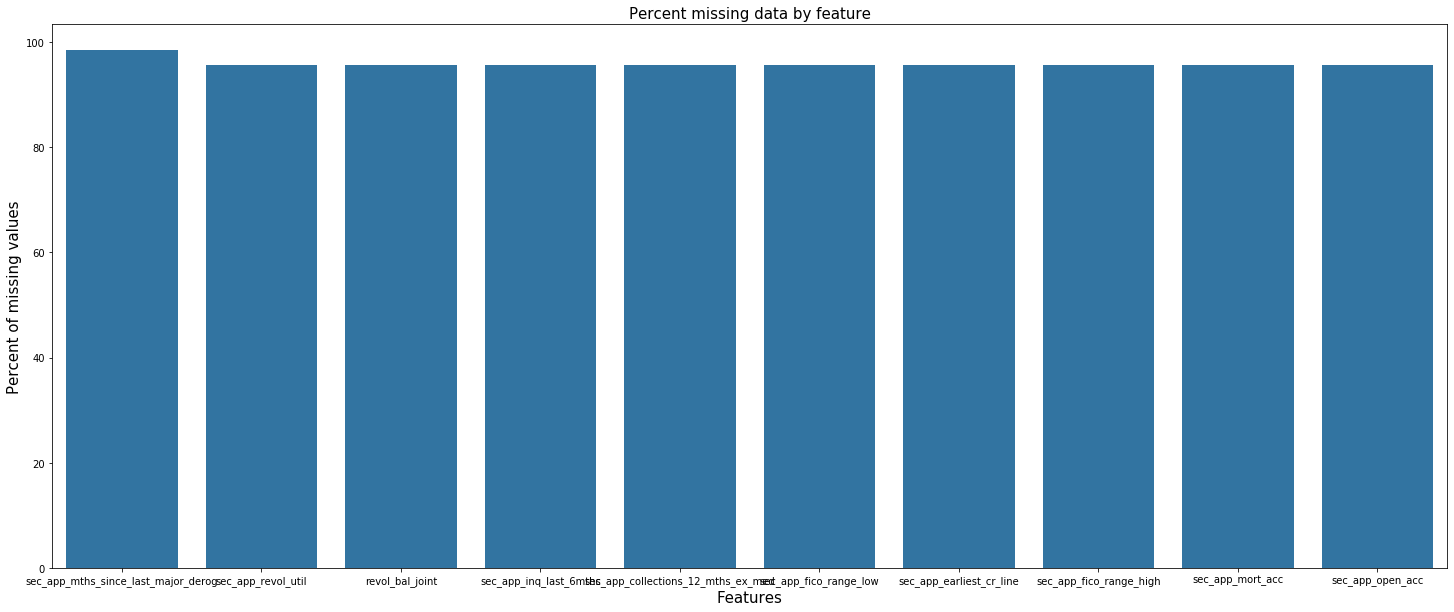

In [9]:
# Let's plot these missing values(%) vs column_names
missing_values_count = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending=False)

plt.figure(figsize=(25,10))

base_color = sns.color_palette()[0]
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10], color = base_color)

plt.show()

In [10]:
num_data = []
non_num_data = []

for col in missing_col:
    if data[col].dtype is pd.np.dtype(object):
        non_num_data.append(col)
    else:
        num_data.append(col)

print(num_data)
print(non_num_data)

['dti', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_tl_120dpd_2m', 'percent_bc_gt_75', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog']
['emp_title', 'emp_length', 'title', 'zip_code', 'revol_util', 'last_credit_pull_d', 'verification_status_joint', 

In [11]:
data.isnull().purpose.sum()

0

In [12]:
grpdata = data.groupby(['loan_status'])['purpose'].agg(['count'])

In [13]:
grpdata.head()

,count
loan_status,
Charged Off,81570
Current,503359
Fully Paid,264241
In Grace Period,8052
Late (16-30 days),4505


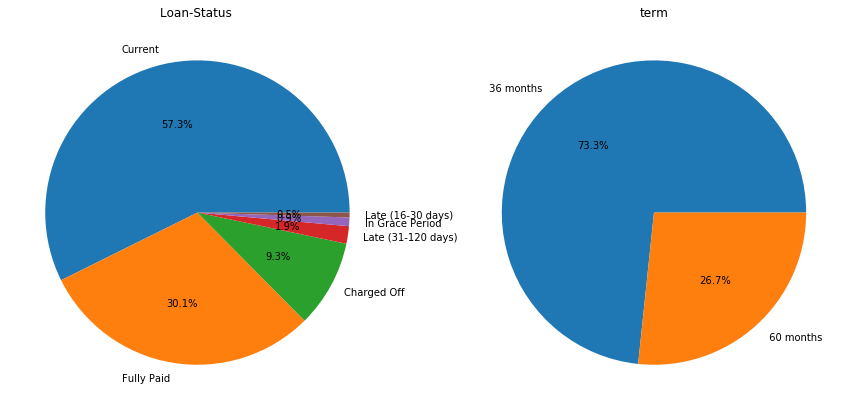

In [14]:
%%time
fig, ax = plt.subplots(1,2, figsize=(15,10))

# Plotting Exterior 1st
ax[0].set_title('Loan-Status ')  
ax[0].pie(data['loan_status'].value_counts()[:10], labels=data['loan_status'].value_counts().index[:10], autopct='%1.1f%%')

# Plotting Exterior 2nd:
ax[1].set_title('term')
ax[1].pie(data['term'].value_counts()[:10], labels=data['term'].value_counts().index[:10], autopct='%1.1f%%')

plt.show()


- By analysing the pie-chart we can say that the current status in 57.3% and fully paid is 30.1%.
- Most of the loan-term is of 36months having 73.3% and 60 months having 26.7%

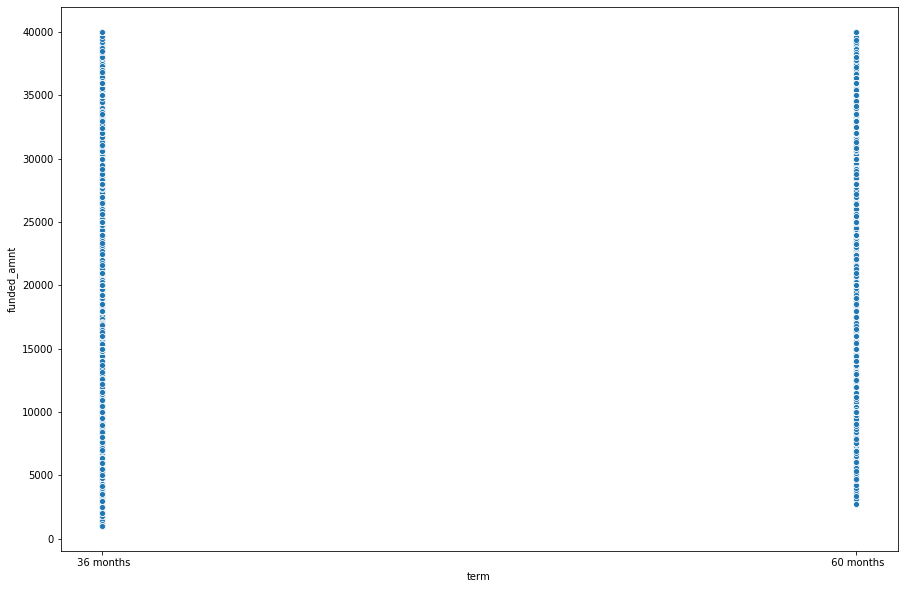

In [15]:
%%time
fig = plt.figure(figsize=(15,10))

sns.scatterplot(data['term'], data['funded_amnt'])
plt.show()

 By analysing the scatter plot we can say that there is no specific term_period to repay funding amount.

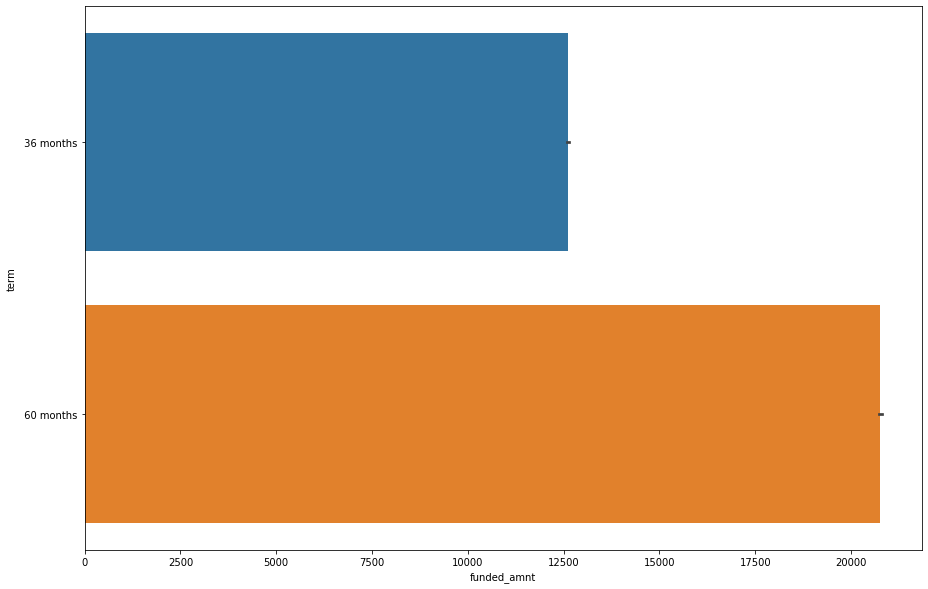

In [16]:
fig = plt.figure(figsize=(15,10))

sns.barplot(data['funded_amnt'], data['term'], order=data['term'].value_counts().index)

plt.show()

In [17]:
data['emp_title'].fillna(data['emp_title'].mode()[0],inplace=True)

In [18]:
## dropping the null values
data.isnull().sum()

id                                          0
funded_amnt                                 0
term                                        0
int_rate                                    0
installment                                 0
                                        ...  
sec_app_open_act_il                    838950
sec_app_num_rev_accts                  838950
sec_app_chargeoff_within_12_mths       838950
sec_app_collections_12_mths_ex_med     838950
sec_app_mths_since_last_major_derog    864421
Length: 109, dtype: int64

In [19]:
data.dropna(axis=1,inplace=True)

In [20]:
data.isnull().sum()

id                            0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
emp_title                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
last_fico_range_high          0
last_fico_range_low           0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_re

List of loan_status:
['Fully Paid' 'Current' 'Charged Off' 'Late (16-30 days)'
 'Late (31-120 days)' 'In Grace Period']


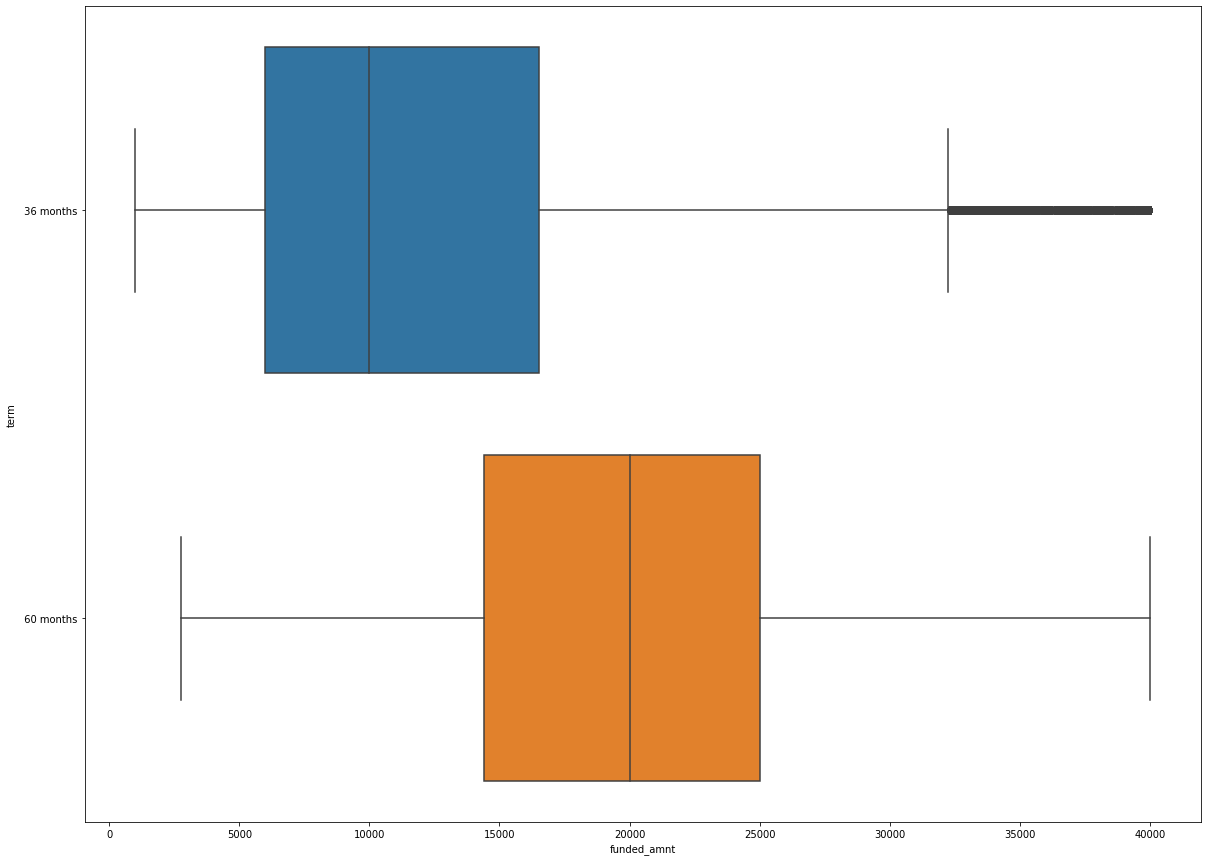

In [21]:
%%time
print('List of loan_status:\n{}'.format(data['loan_status'].unique()))
fig = plt.figure(figsize=(20,15))

sns.boxplot(data['funded_amnt'], data['term'])

plt.show()

 Here we have no outliers in funded_amnt but we have outliers in term columns

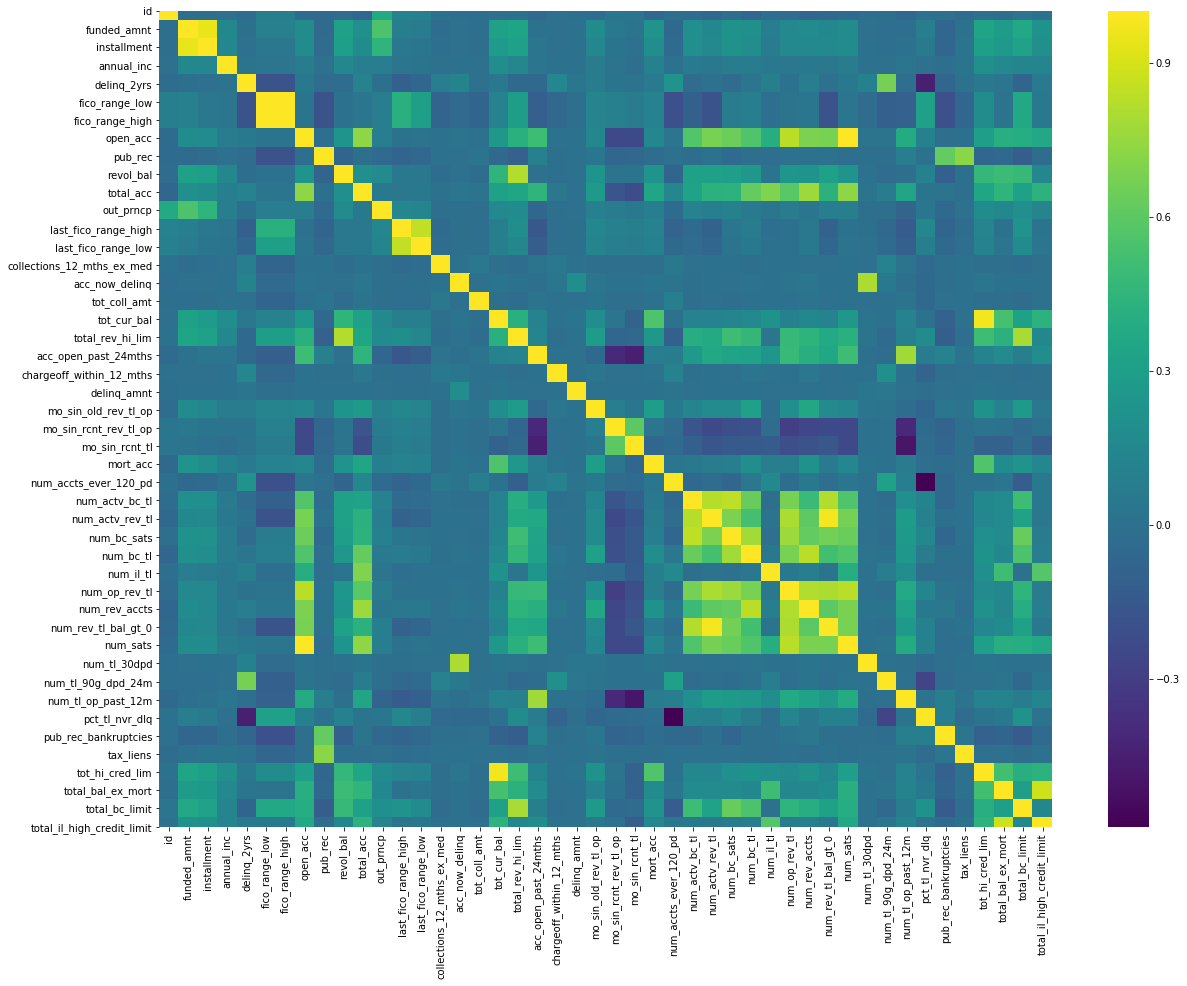

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='viridis')

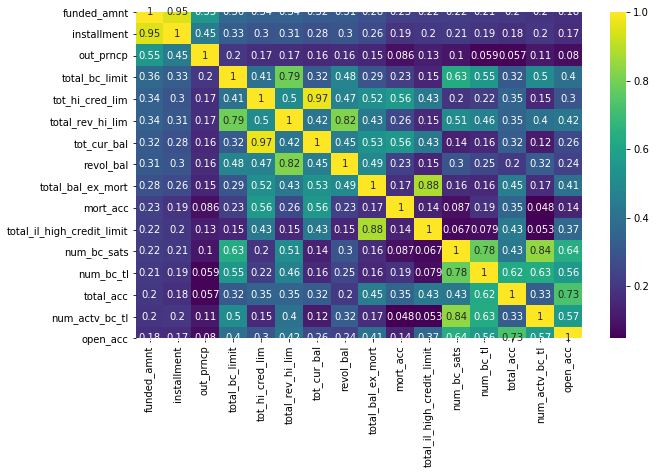

In [26]:
k=16  #number of variables for heatmap
cols = data.corr().nlargest(k,'funded_amnt')['funded_amnt'].index
cm = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='viridis')

In [34]:
data.groupby('addr_state')['funded_amnt'].agg(['count', 'mean'])

,count,mean
addr_state,,
AK,1976,17195.774291
AL,10476,14205.572260
AR,6624,13594.485960
AZ,21216,14283.017534
CA,117739,15283.491451
CO,18264,14689.787286
CT,14299,15059.984964
DC,1940,16048.311856
DE,2498,14523.208567


### Annual Income

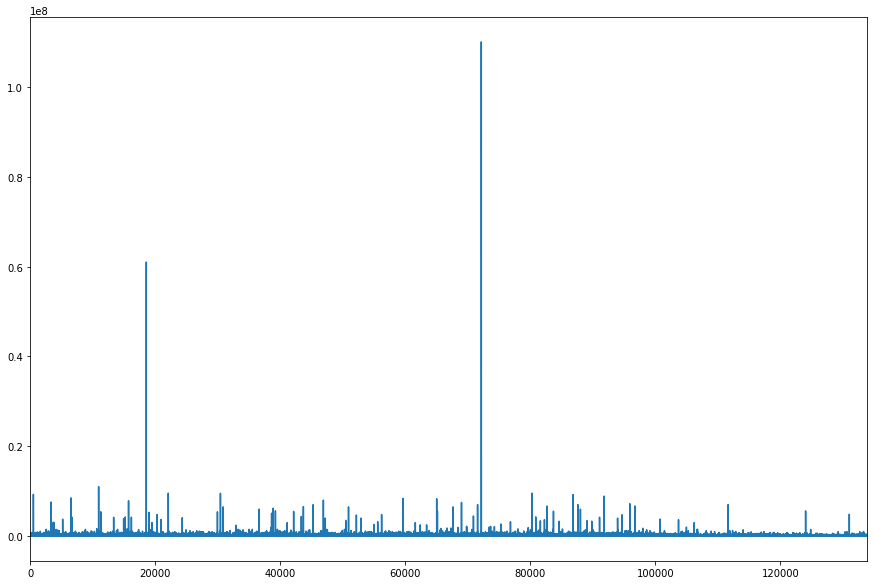

In [35]:
fig = plt.figure(figsize=(15,10))

data['annual_inc'].plot()

plt.show()

### Purpose for loan

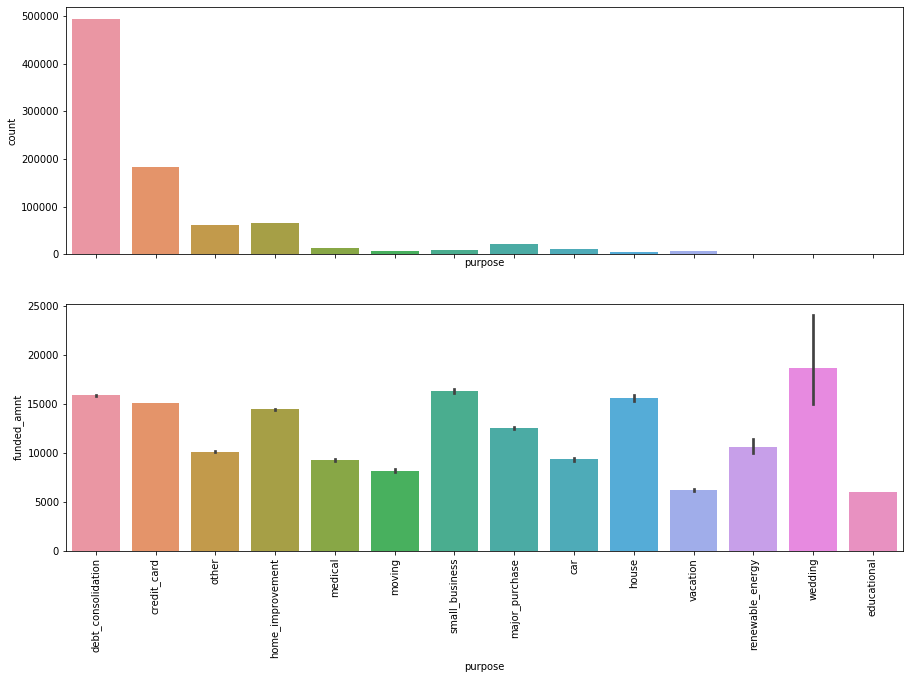

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(15,10), sharex=True)

sns.countplot(data['purpose'], ax=axes[0])
plt.xticks(rotation=90)

sns.barplot(data['purpose'], data['funded_amnt'], ax=axes[1])
plt.xticks(rotation=90)

plt.show()

In [42]:
# First remove the % sign 
data['int_rate_new'] = data['int_rate'].str.split('%', expand=True)[0]

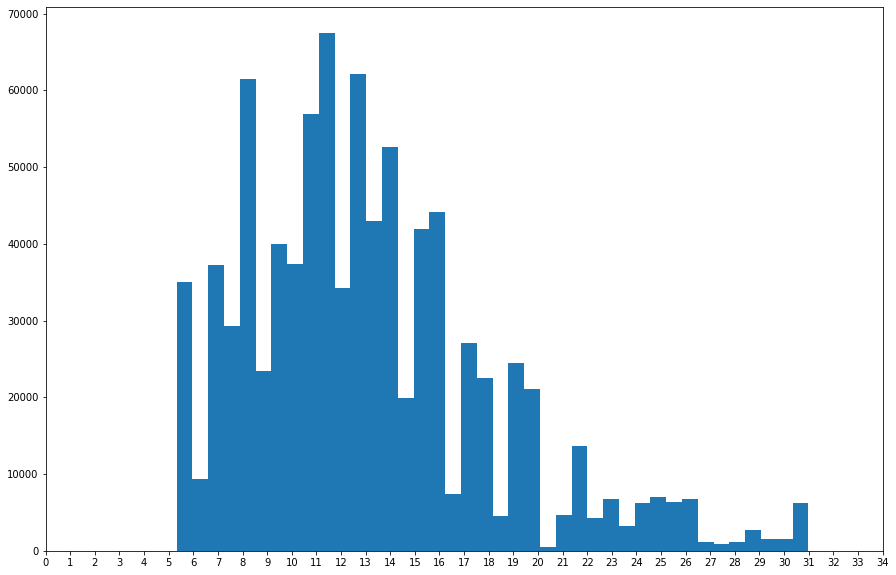

In [44]:
# Plot rate of interest on Funded Amount
fig = plt.figure(figsize=(15,10))

plt.hist(data['int_rate_new'].astype('float64'), bins=40)
plt.xticks(np.arange(0,35,1))

plt.show()

**Here, most common interest rate is between 11 and 12%. While the maximum interest rate given is around 31%.**

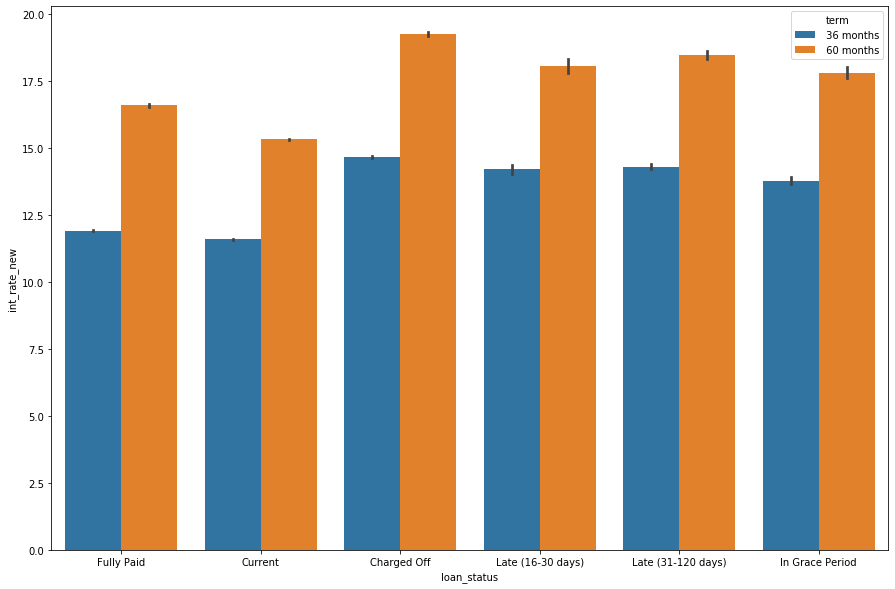

In [46]:
# Loan Status and Interest Rate
fig = plt.figure(figsize=(15,10))

sns.barplot(data['loan_status'], data['int_rate_new'].astype('float64'), hue=data['term'])

plt.show()

### Loan_Status and funded_amnt

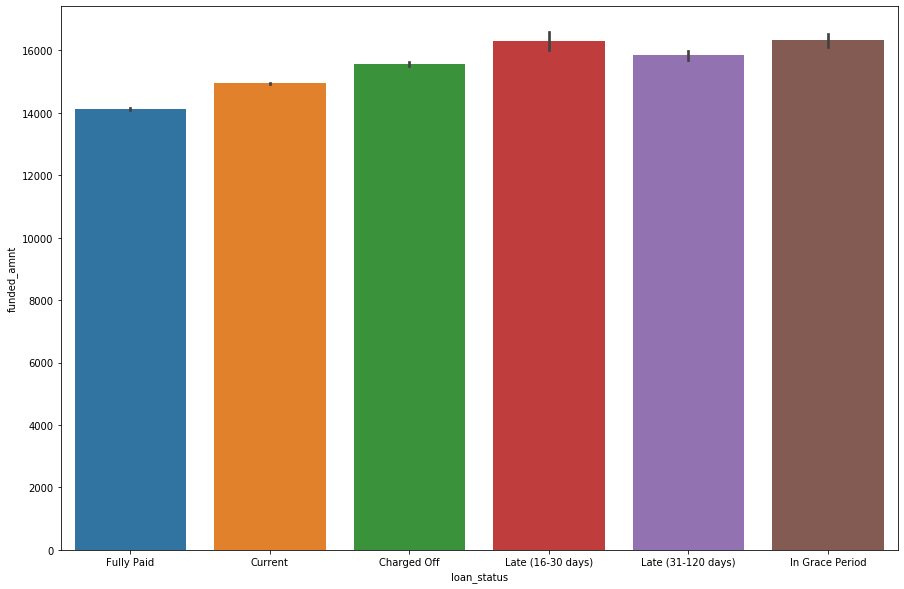

In [40]:
fig = plt.figure(figsize=(15,10))

sns.barplot(data['loan_status'], data['funded_amnt'])

plt.show()

**From this graph it is understood that most of the loans are late where funded amount was high.
While the loans with lower amount are fully paid.**

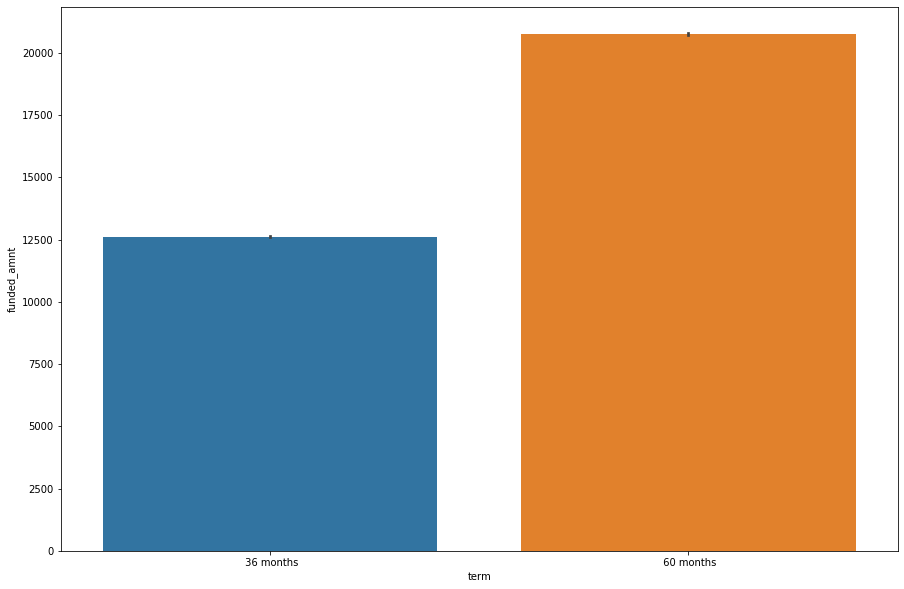

In [41]:
# Term and Funded Amount
fig = plt.figure(figsize=(15,10))

sns.barplot(data['term'], data['funded_amnt'])

plt.show()

### Verification status

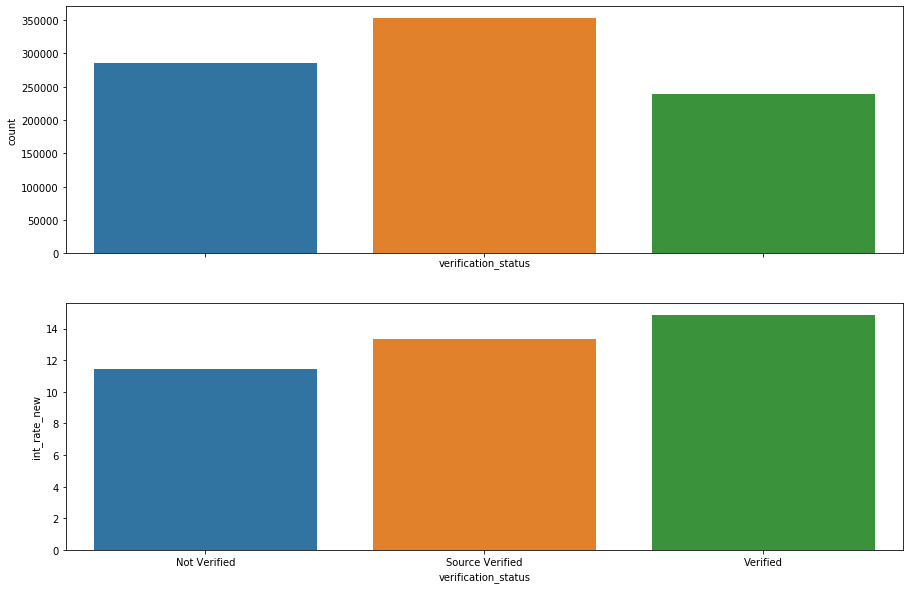

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(15,10), sharex=True)

sns.countplot(data['verification_status'], ax=axes[0])

sns.barplot(data['verification_status'], data['int_rate_new'].astype('float64'), ax=axes[1])

plt.show()

**Installment**

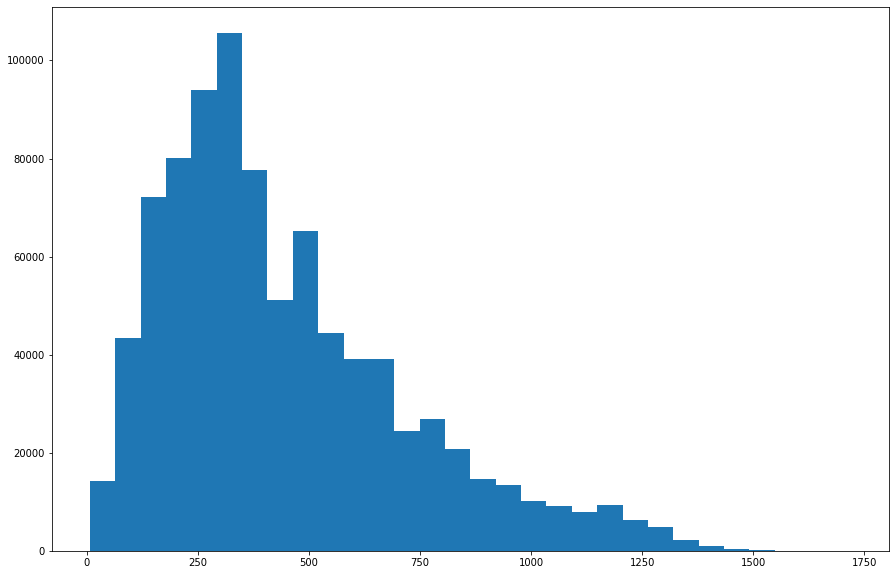

In [48]:
fig = plt.figure(figsize=(15,10))

plt.hist(data['installment'], bins=30)

plt.show()

### Sub-grade

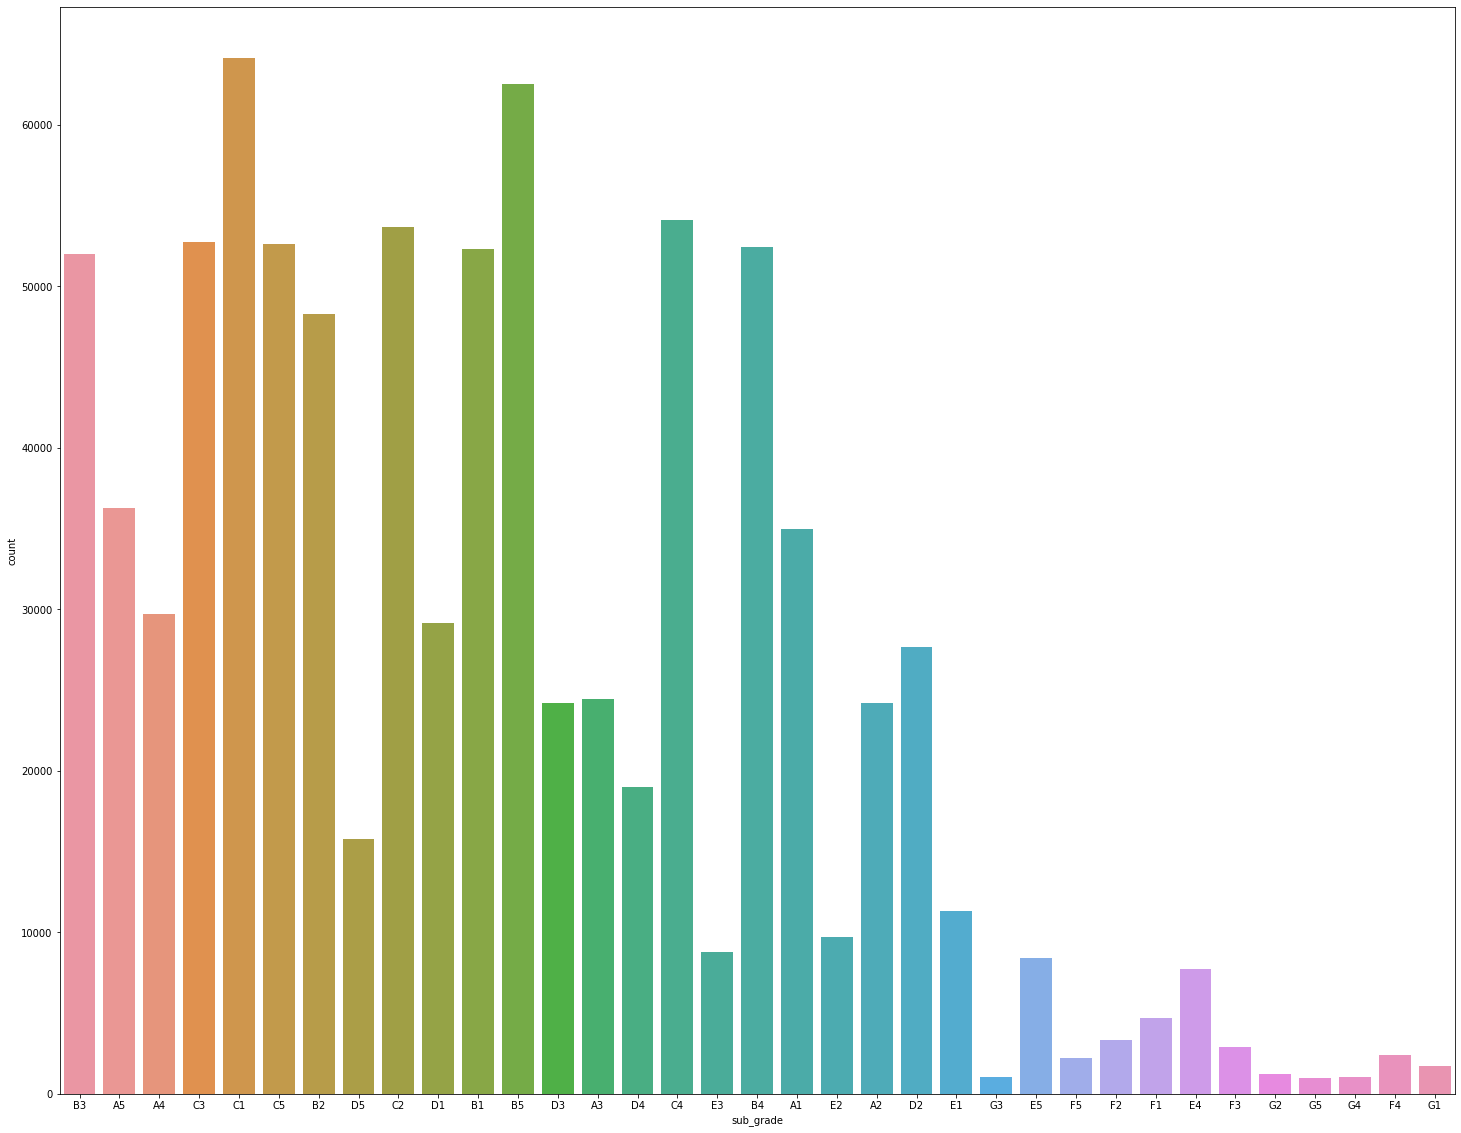

In [50]:
fig = plt.figure(figsize=(25,20))

sns.countplot(data['sub_grade'])

plt.show()

#### Home Ownership

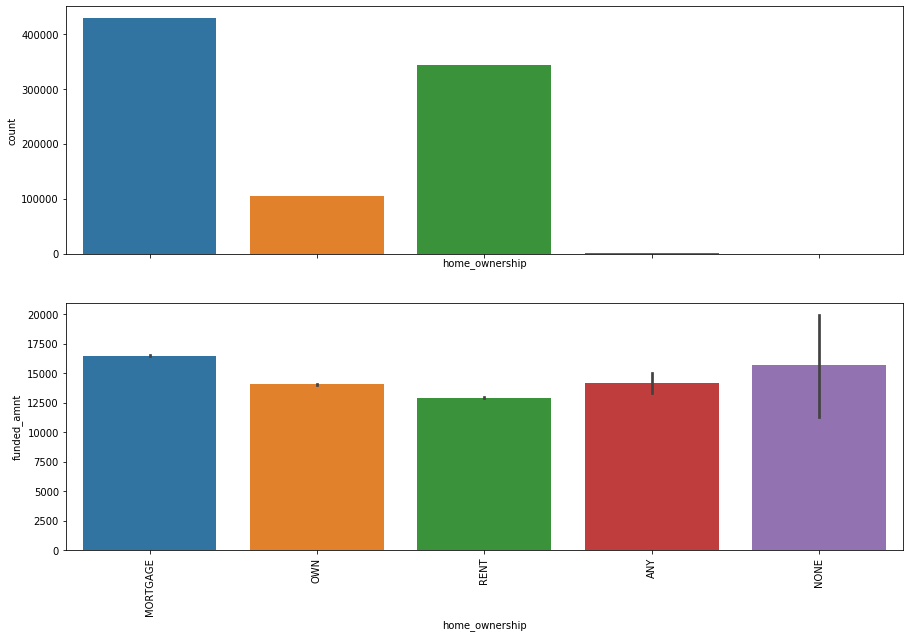

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(15,10), sharex=True)

sns.countplot(data['home_ownership'], ax=axes[0])
plt.xticks(rotation=90)

sns.barplot(data['home_ownership'], data['funded_amnt'], ax=axes[1])
plt.xticks(rotation=90)

plt.show()

### Summary

While exploring the data we focused on the important attributes like **term**,**funded_amnt** most of the vital information is contained in the first columns where we can pull more insights from it. I had performed all the EDA steps handled the missing values and also performed groupby function on different columns. Generated several visualization like pie-chart bar-chart,scatter plot and other visualzations also. Generated correlation also to check the relationship between each and every attribute.